In [ ]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line, resize, rescale)
import scipy.ndimage
from skimage.transform import hough_circle, hough_circle_peaks
from scipy.stats import norm
import scipy.stats as stats

import pandas as pd
import pickle
import time
from IPython import display

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']
x_resolution = y_resolution = 2304 ####????
x_resolution = y_resolution = 2048
from itertools import combinations
from skimage import io

# fa il piesditallo da uno streem di TIF

In [ ]:
tag  = 'TES'
runI = ["2355.tif"]
run = 2355
m_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)
s_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)

n0 = 0
for nRi in range(0,len(runI)):
    iTr = 0
    filename = runI[nRi]
    print ('Download and open file: '+cy.swift_fileByname(tag, filename))
    try:
        tmp_file = cy.swift_download_file(cy.swift_fileByname(tag, filename))
        print ("DONE")
    except:
        print ("File download ERROR")
        break
        
    print ('Open file: '+tmp_file)

    while True:
        try:    
            image = io.imread(tmp_file, img_num=iTr)
            iTr +=1
        except:
            print ("NO image at:"+ str(iTr))
            break
        m_image += image
        s_image += image**2 
        if n0 > 0:  # print progress and debung info for poit 200, 200...
            print ("Image[200,200]: %d => %.2f %.2f %.2f " % (iTr,
                                             image[200,200],
                                             np.sqrt((s_image[200,200] - 
                                                     m_image[200,200]**2 
                                                      / (n0+1)) / n0),
                                             m_image[200,200]/(n0+1),
                                             ))
        n0 += 1
    m_image = m_image/n0
    s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))
    
###### print Info and Save OutPut ######################################
    
print ("sigma %f" % (s_image[200,200]))
fileoutm = ("./data/run%d_mean.h5" % (run))
cy.write_image_h5(fileoutm, m_image)
fileouts = ("./data/run%d_sigma.h5" % (run))
cy.write_image_h5(fileouts, s_image)
print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))
if not cy.rm_file(tmp_file):
    print (">> File "+tmp_file+" removed")

# piedistallo da serie di imgani TIF separate

In [14]:
tag  = 'TES'
runI = [3520]
start_image_to_read = 0
max_image_to_read = 0
n0 = 0
for nRi in range(0,len(runI)):
    iTr = 0
    dirname = tag+"/Run"+str(runI[nRi])
    try:
        nImag=np.size(cy.swift_listdir(dirname))
        
        print ("# of Image Files: %d" % (nImag))
    
    except:
        print ("ERROR: No file %d" % (runI[nRi]))
        break
    if max_image_to_read != 0:
        nImag = max_image_to_read   
    print ("WARNING: data will be anlyzed from %d to %d" % (start_image_to_read, nImag))
    
    m_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)
    s_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)

    n0 = 0
    for iImg in range(start_image_to_read, nImag-1):
        filename = "img_{0:09d}_Default_000.tif".format(iImg)
        # filename = "img_000000101_Default_000.tif"
        tmp_file = cy.swift_download_file(cy.swift_fileByname(dirname, filename))
        # img_000000101_Default_000.tif
        image = io.imread(tmp_file)
        #
        m_image += image
        s_image += image**2 
        if n0 > 0:  # print progress and debung info for poit 200, 200...
            print ("Image[200,200]: %d => %.2f %.2f %.2f " % (iImg,
                                             image[200,200],
                                             np.sqrt((s_image[200,200] - 
                                                     m_image[200,200]**2 
                                                      / (n0+1)) / n0),
                                             m_image[200,200]/(n0+1),
                                             ))
        n0 += 1
        if not cy.rm_file(tmp_file):
            print (">> File "+tmp_file+" removed")

    m_image = m_image/n0
    s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))
    
###### print Info and Save OutPut ######################################
    
    print ("sigma %f" % (s_image[200,200]))
    fileoutm = ("./data/run%d_mean.h5" % (runI[nRi]))
    cy.write_image_h5(fileoutm, m_image)
    fileouts = ("./data/run%d_sigma.h5" % (runI[nRi]))
    cy.write_image_h5(fileouts, s_image)
    print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))
    

# of Image Files: 201


 43.4% 3645440 / 8399386

100.1% 8404992 / 8399386


>> File ./tmp.11303.root removed


 68.3% 5734400 / 8399386

100.1% 8404992 / 8399386


Image[200,200]: 1 => 104.00 3.54 101.50 
>> File ./tmp.11303.root removed


 38.7% 3252224 / 8399392

100.1% 8404992 / 8399392


Image[200,200]: 2 => 103.00 2.65 102.00 
>> File ./tmp.11303.root removed


 62.0% 5210112 / 8399392

100.1% 8404992 / 8399392


Image[200,200]: 3 => 95.00 4.11 100.25 
>> File ./tmp.11303.root removed


 48.0% 4030464 / 8399392

100.1% 8404992 / 8399392


Image[200,200]: 4 => 95.00 4.27 99.20 
>> File ./tmp.11303.root removed


 55.6% 4669440 / 8399392

100.1% 8404992 / 8399392


Image[200,200]: 5 => 96.00 4.03 98.67 
>> File ./tmp.11303.root removed


 44.4% 3727360 / 8399392

100.1% 8404992 / 8399392


Image[200,200]: 6 => 104.00 4.20 99.43 
>> File ./tmp.11303.root removed


 53.8% 4521984 / 8399394

100.1% 8404992 / 8399394


Image[200,200]: 7 => 105.00 4.36 100.12 
>> File ./tmp.11303.root removed


 45.2% 3792896 / 8399394

100.1% 8404992 / 8399394


Image[200,200]: 8 => 99.00 4.09 100.00 
>> File ./tmp.11303.root removed


 70.9% 5955584 / 8399402

100.1% 8404992 / 8399402


Image[200,200]: 9 => 107.00 4.45 100.70 
>> File ./tmp.11303.root removed


 42.6% 3579904 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 10 => 101.00 4.22 100.73 
>> File ./tmp.11303.root removed


 66.7% 5603328 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 11 => 106.00 4.30 101.17 
>> File ./tmp.11303.root removed


 43.7% 3670016 / 8399408

 97.2% 8167424 / 8399408

100.1% 8404992 / 8399408
  0.4%   32768 / 8399408

Image[200,200]: 12 => 105.00 4.25 101.46 
>> File ./tmp.11303.root removed


 81.9% 6881280 / 8399408

100.1% 8404992 / 8399408
  0.3%   24576 / 8399408

Image[200,200]: 13 => 105.00 4.20 101.71 
>> File ./tmp.11303.root removed


 42.6% 3579904 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 14 => 97.00 4.22 101.40 
>> File ./tmp.11303.root removed


 61.8% 5193728 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 15 => 98.00 4.17 101.19 
>> File ./tmp.11303.root removed


 48.1% 4038656 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 16 => 94.00 4.40 100.76 
>> File ./tmp.11303.root removed


 75.1% 6307840 / 8399406

100.1% 8404992 / 8399406


Image[200,200]: 17 => 101.00 4.26 100.78 
>> File ./tmp.11303.root removed


 44.1% 3702784 / 8399406

100.1% 8404992 / 8399406


Image[200,200]: 18 => 95.00 4.35 100.47 
>> File ./tmp.11303.root removed


 54.9% 4612096 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 19 => 100.00 4.24 100.45 
>> File ./tmp.11303.root removed


 39.5% 3317760 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 20 => 113.00 4.95 101.05 
>> File ./tmp.11303.root removed


 68.5% 5750784 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 21 => 99.00 4.85 100.95 
>> File ./tmp.11303.root removed


 37.2% 3121152 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 22 => 99.00 4.76 100.87 
>> File ./tmp.11303.root removed


 59.7% 5013504 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 23 => 96.00 4.76 100.67 
>> File ./tmp.11303.root removed


 48.4% 4063232 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 24 => 95.00 4.80 100.44 
>> File ./tmp.11303.root removed


 71.1% 5971968 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 25 => 98.00 4.72 100.35 
>> File ./tmp.11303.root removed


 43.2% 3629056 / 8399430

 92.1% 7733248 / 8399430

100.1% 8404992 / 8399430
  0.7%   57344 / 8399430

Image[200,200]: 26 => 103.00 4.66 100.44 
>> File ./tmp.11303.root removed


 87.3% 7331840 / 8399430

100.1% 8404992 / 8399430
  1.1%   90112 / 8399408

Image[200,200]: 27 => 99.00 4.58 100.39 
>> File ./tmp.11303.root removed


 59.4% 4988928 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 28 => 105.00 4.58 100.55 
>> File ./tmp.11303.root removed


 56.8% 4767744 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 29 => 99.00 4.51 100.50 
>> File ./tmp.11303.root removed


 41.9% 3522560 / 8399406

 85.7% 7200768 / 8399406

100.1% 8404992 / 8399406


Image[200,200]: 30 => 102.00 4.44 100.55 
>> File ./tmp.11303.root removed


 73.1% 6144000 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 31 => 95.00 4.48 100.38 
>> File ./tmp.11303.root removed


 32.4% 2719744 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 32 => 101.00 4.41 100.39 
>> File ./tmp.11303.root removed


 73.6% 6184960 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 33 => 99.00 4.35 100.35 
>> File ./tmp.11303.root removed


100.1% 8404992 / 8399430


Image[200,200]: 34 => 99.00 4.29 100.31 
>> File ./tmp.11303.root removed


 76.8% 6447104 / 8399406

100.1% 8404992 / 8399406


Image[200,200]: 35 => 101.00 4.23 100.33 
>> File ./tmp.11303.root removed


 44.4% 3727360 / 8399408

 99.8% 8380416 / 8399408

100.1% 8404992 / 8399408
  1.0%   81920 / 8399408

Image[200,200]: 36 => 99.00 4.18 100.30 
>> File ./tmp.11303.root removed


 96.7% 8118272 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 37 => 104.00 4.16 100.39 
>> File ./tmp.11303.root removed


 43.2% 3629056 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 38 => 100.00 4.11 100.38 
>> File ./tmp.11303.root removed


 74.3% 6242304 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 39 => 104.00 4.09 100.47 
>> File ./tmp.11303.root removed


 44.2% 3710976 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 40 => 98.00 4.06 100.41 
>> File ./tmp.11303.root removed


 60.7% 5095424 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 41 => 106.00 4.10 100.55 
>> File ./tmp.11303.root removed


100.1% 8404992 / 8399408


Image[200,200]: 42 => 95.00 4.14 100.42 
>> File ./tmp.11303.root removed


 55.1% 4628480 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 43 => 105.00 4.15 100.52 
>> File ./tmp.11303.root removed


 41.6% 3497984 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 44 => 106.00 4.18 100.64 
>> File ./tmp.11303.root removed


 59.7% 5013504 / 8399409

100.1% 8404992 / 8399409


Image[200,200]: 45 => 94.00 4.25 100.50 
>> File ./tmp.11303.root removed


 39.3% 3301376 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 46 => 93.00 4.35 100.34 
>> File ./tmp.11303.root removed


 48.4% 4063232 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 47 => 104.00 4.33 100.42 
>> File ./tmp.11303.root removed


 40.9% 3432448 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 48 => 99.00 4.29 100.39 
>> File ./tmp.11303.root removed


 46.6% 3915776 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 49 => 98.00 4.26 100.34 
>> File ./tmp.11303.root removed


 45.1% 3784704 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 50 => 100.00 4.22 100.33 
>> File ./tmp.11303.root removed


 41.1% 3448832 / 8399408

 91.6% 7692288 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 51 => 99.00 4.18 100.31 
>> File ./tmp.11303.root removed


 38.4% 3227648 / 8399406

100.1% 8404992 / 8399406


Image[200,200]: 52 => 96.00 4.18 100.23 
>> File ./tmp.11303.root removed


 45.7% 3842048 / 8399406

100.1% 8404992 / 8399406


Image[200,200]: 53 => 98.00 4.15 100.19 
>> File ./tmp.11303.root removed


 46.3% 3891200 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 54 => 96.00 4.15 100.11 
>> File ./tmp.11303.root removed


 52.1% 4374528 / 8399430

100.1% 8404992 / 8399430


Image[200,200]: 55 => 98.00 4.12 100.07 
>> File ./tmp.11303.root removed


 42.1% 3538944 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 56 => 92.00 4.23 99.93 
>> File ./tmp.11303.root removed


 59.1% 4964352 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 57 => 98.00 4.20 99.90 
>> File ./tmp.11303.root removed


 44.4% 3727360 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 58 => 92.00 4.28 99.76 
>> File ./tmp.11303.root removed


 55.6% 4669440 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 59 => 101.00 4.25 99.78 
>> File ./tmp.11303.root removed


 41.5% 3481600 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 60 => 96.00 4.24 99.72 
>> File ./tmp.11303.root removed


 45.2% 3792896 / 8399428

100.1% 8404992 / 8399428


Image[200,200]: 61 => 105.00 4.26 99.81 
>> File ./tmp.11303.root removed


 47.5% 3989504 / 8399428

 96.6% 8110080 / 8399428

100.1% 8404992 / 8399428
  0.3%   24576 / 8399408

Image[200,200]: 62 => 104.00 4.26 99.87 
>> File ./tmp.11303.root removed


 57.1% 4792320 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 63 => 108.00 4.35 100.00 
>> File ./tmp.11303.root removed


 35.4% 2973696 / 8399408

 78.4% 6586368 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 64 => 99.00 4.31 99.98 
>> File ./tmp.11303.root removed


 55.8% 4685824 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 65 => 94.00 4.34 99.89 
>> File ./tmp.11303.root removed


 36.3% 3047424 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 66 => 105.00 4.36 99.97 
>> File ./tmp.11303.root removed


 45.2% 3792896 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 67 => 95.00 4.36 99.90 
>> File ./tmp.11303.root removed


 37.3% 3129344 / 8399428

100.1% 8404992 / 8399428


Image[200,200]: 68 => 96.00 4.36 99.84 
>> File ./tmp.11303.root removed


 61.1% 5128192 / 8399428

100.1% 8404992 / 8399428


Image[200,200]: 69 => 103.00 4.34 99.89 
>> File ./tmp.11303.root removed


 33.0% 2768896 / 8399406

 69.6% 5849088 / 8399406

100.1% 8404992 / 8399406


Image[200,200]: 70 => 99.00 4.31 99.87 
>> File ./tmp.11303.root removed


 48.7% 4087808 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 71 => 93.00 4.36 99.78 
>> File ./tmp.11303.root removed


 32.9% 2760704 / 8399408

 96.1% 8069120 / 8399408

100.1% 8404992 / 8399408
  1.0%   81920 / 8399408

Image[200,200]: 72 => 101.00 4.33 99.79 
>> File ./tmp.11303.root removed


 68.9% 5783552 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 73 => 96.00 4.32 99.74 
>> File ./tmp.11303.root removed


 33.3% 2793472 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 74 => 100.00 4.29 99.75 
>> File ./tmp.11303.root removed


 55.1% 4628480 / 8399428

100.1% 8404992 / 8399428


Image[200,200]: 75 => 104.00 4.29 99.80 
>> File ./tmp.11303.root removed


 40.7% 3416064 / 8399428

100.1% 8404992 / 8399428


Image[200,200]: 76 => 105.00 4.31 99.87 
>> File ./tmp.11303.root removed


 51.6% 4333568 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 77 => 103.00 4.29 99.91 
>> File ./tmp.11303.root removed


 34.4% 2891776 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 78 => 104.00 4.29 99.96 
>> File ./tmp.11303.root removed


 66.1% 5554176 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 79 => 95.00 4.30 99.90 
>> File ./tmp.11303.root removed


 44.1% 3702784 / 8399428

 96.9% 8142848 / 8399428

100.1% 8404992 / 8399428
  4.3%  360448 / 8399408

Image[200,200]: 80 => 104.00 4.30 99.95 
>> File ./tmp.11303.root removed


100.1% 8404992 / 8399408


Image[200,200]: 81 => 101.00 4.27 99.96 
>> File ./tmp.11303.root removed


 46.3% 3891200 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 82 => 103.00 4.26 100.00 
>> File ./tmp.11303.root removed


 45.3% 3801088 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 83 => 87.00 4.46 99.85 
>> File ./tmp.11303.root removed


 45.0% 3776512 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 84 => 104.00 4.46 99.89 
>> File ./tmp.11303.root removed


 33.2% 2785280 / 8399408

 90.0% 7561216 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 85 => 94.00 4.48 99.83 
>> File ./tmp.11303.root removed


 44.0% 3694592 / 8399408

 97.2% 8167424 / 8399408

100.1% 8404992 / 8399408
  4.3%  360448 / 8399406

Image[200,200]: 86 => 94.00 4.50 99.76 
>> File ./tmp.11303.root removed


 87.0% 7307264 / 8399406

100.1% 8404992 / 8399406
  0.3%   24576 / 8399406

Image[200,200]: 87 => 99.00 4.47 99.75 
>> File ./tmp.11303.root removed


 52.0% 4366336 / 8399406

100.1% 8404992 / 8399406


Image[200,200]: 88 => 108.00 4.53 99.84 
>> File ./tmp.11303.root removed


 53.7% 4513792 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 89 => 104.00 4.53 99.89 
>> File ./tmp.11303.root removed


 32.7% 2744320 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 90 => 103.00 4.51 99.92 
>> File ./tmp.11303.root removed


 52.5% 4407296 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 91 => 99.00 4.49 99.91 
>> File ./tmp.11303.root removed


 45.6% 3833856 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 92 => 101.00 4.47 99.92 
>> File ./tmp.11303.root removed


 52.5% 4407296 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 93 => 101.00 4.44 99.94 
>> File ./tmp.11303.root removed


 45.8% 3850240 / 8399428

100.1% 8404992 / 8399428


Image[200,200]: 94 => 99.00 4.42 99.93 
>> File ./tmp.11303.root removed


 53.9% 4530176 / 8399428

100.1% 8404992 / 8399428


Image[200,200]: 95 => 100.00 4.40 99.93 
>> File ./tmp.11303.root removed


 46.8% 3932160 / 8399408

100.1% 8404992 / 8399408


Image[200,200]: 96 => 98.00 4.38 99.91 
>> File ./tmp.11303.root removed


 62.0% 5210112 / 8399410

100.1% 8404992 / 8399410


Image[200,200]: 97 => 98.00 4.36 99.89 
>> File ./tmp.11303.root removed


 44.7% 3751936 / 8399410

 92.3% 7749632 / 8399410

100.1% 8404992 / 8399410
  1.5%  122880 / 8399418

Image[200,200]: 98 => 100.00 4.34 99.89 
>> File ./tmp.11303.root removed


 75.2% 6316032 / 8399418

100.1% 8404992 / 8399418
  0.3%   24576 / 8399424

Image[200,200]: 99 => 103.00 4.33 99.92 
>> File ./tmp.11303.root removed


 50.7% 4259840 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 100 => 95.00 4.33 99.87 
>> File ./tmp.11303.root removed


 56.4% 4734976 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 101 => 98.00 4.32 99.85 
>> File ./tmp.11303.root removed


 44.2% 3710976 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 102 => 99.00 4.29 99.84 
>> File ./tmp.11303.root removed


 53.7% 4513792 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 103 => 99.00 4.27 99.84 
>> File ./tmp.11303.root removed


 39.5% 3317760 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 104 => 98.00 4.26 99.82 
>> File ./tmp.11303.root removed


 52.8% 4431872 / 8399422

100.1% 8404992 / 8399422


Image[200,200]: 105 => 97.00 4.25 99.79 
>> File ./tmp.11303.root removed


 45.4% 3809280 / 8399424

 97.2% 8167424 / 8399424

100.1% 8404992 / 8399424
  1.0%   81920 / 8399424

Image[200,200]: 106 => 108.00 4.30 99.87 
>> File ./tmp.11303.root removed


 58.7% 4931584 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 107 => 93.00 4.33 99.81 
>> File ./tmp.11303.root removed


 44.0% 3694592 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 108 => 99.00 4.31 99.80 
>> File ./tmp.11303.root removed


 51.2% 4300800 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 109 => 102.00 4.30 99.82 
>> File ./tmp.11303.root removed


100.1% 8404992 / 8399424


Image[200,200]: 110 => 97.00 4.29 99.79 
>> File ./tmp.11303.root removed


 41.5% 3489792 / 8399424

 88.7% 7446528 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 111 => 98.00 4.27 99.78 
>> File ./tmp.11303.root removed


 46.1% 3874816 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 112 => 93.00 4.30 99.72 
>> File ./tmp.11303.root removed


 44.6% 3743744 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 113 => 103.00 4.29 99.75 
>> File ./tmp.11303.root removed


 46.5% 3907584 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 114 => 100.00 4.27 99.75 
>> File ./tmp.11303.root removed


 55.1% 4628480 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 115 => 103.00 4.26 99.78 
>> File ./tmp.11303.root removed


 44.0% 3694592 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 116 => 103.00 4.26 99.80 
>> File ./tmp.11303.root removed


 59.7% 5013504 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 117 => 95.00 4.26 99.76 
>> File ./tmp.11303.root removed


 37.5% 3153920 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 118 => 105.00 4.27 99.81 
>> File ./tmp.11303.root removed


 51.8% 4349952 / 8399424

 84.3% 7077888 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 119 => 105.00 4.28 99.85 
>> File ./tmp.11303.root removed


 42.4% 3563520 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 120 => 101.00 4.26 99.86 
>> File ./tmp.11303.root removed


 52.1% 4374528 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 121 => 101.00 4.24 99.87 
>> File ./tmp.11303.root removed


 41.3% 3465216 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 122 => 106.00 4.26 99.92 
>> File ./tmp.11303.root removed


 59.5% 4997120 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 123 => 101.00 4.25 99.93 
>> File ./tmp.11303.root removed


 45.9% 3858432 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 124 => 98.00 4.23 99.91 
>> File ./tmp.11303.root removed


 48.0% 4030464 / 8399424

 90.4% 7593984 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 125 => 99.00 4.22 99.90 
>> File ./tmp.11303.root removed


 40.6% 3407872 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 126 => 100.00 4.20 99.91 
>> File ./tmp.11303.root removed


 50.9% 4276224 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 127 => 91.00 4.26 99.84 
>> File ./tmp.11303.root removed


 41.6% 3497984 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 128 => 99.00 4.24 99.83 
>> File ./tmp.11303.root removed


 62.6% 5259264 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 129 => 96.00 4.24 99.80 
>> File ./tmp.11303.root removed


 40.1% 3366912 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 130 => 103.00 4.23 99.82 
>> File ./tmp.11303.root removed


 41.5% 3489792 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 131 => 104.00 4.23 99.86 
>> File ./tmp.11303.root removed


 33.1% 2777088 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 132 => 101.00 4.22 99.86 
>> File ./tmp.11303.root removed


100.1% 8404992 / 8399424


Image[200,200]: 133 => 109.00 4.27 99.93 
>> File ./tmp.11303.root removed


 48.5% 4071424 / 8399424

 95.3% 8003584 / 8399424

100.1% 8404992 / 8399424
  0.3%   24576 / 8399424

Image[200,200]: 134 => 95.00 4.28 99.90 
>> File ./tmp.11303.root removed


 59.9% 5029888 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 135 => 98.00 4.27 99.88 
>> File ./tmp.11303.root removed


 48.4% 4063232 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 136 => 107.00 4.29 99.93 
>> File ./tmp.11303.root removed


 60.8% 5103616 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 137 => 98.00 4.28 99.92 
>> File ./tmp.11303.root removed


 47.3% 3973120 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 138 => 103.00 4.27 99.94 
>> File ./tmp.11303.root removed


 32.3% 2711552 / 8399444

 71.1% 5971968 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 139 => 102.00 4.26 99.96 
>> File ./tmp.11303.root removed


 46.2% 3883008 / 8399422

100.1% 8404992 / 8399422


Image[200,200]: 140 => 106.00 4.28 100.00 
>> File ./tmp.11303.root removed


 61.7% 5185536 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 141 => 99.00 4.26 99.99 
>> File ./tmp.11303.root removed


 45.4% 3809280 / 8399424

 83.8% 7036928 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 142 => 103.00 4.25 100.01 
>> File ./tmp.11303.root removed


 60.3% 5062656 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 143 => 96.00 4.25 99.99 
>> File ./tmp.11303.root removed


 41.0% 3440640 / 8399424

 91.7% 7700480 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 144 => 100.00 4.24 99.99 
>> File ./tmp.11303.root removed


 58.6% 4923392 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 145 => 96.00 4.24 99.96 
>> File ./tmp.11303.root removed


 46.9% 3940352 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 146 => 94.00 4.25 99.92 
>> File ./tmp.11303.root removed


 60.0% 5038080 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 147 => 99.00 4.24 99.91 
>> File ./tmp.11303.root removed


 46.3% 3891200 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 148 => 99.00 4.22 99.91 
>> File ./tmp.11303.root removed


 63.5% 5332992 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 149 => 99.00 4.21 99.90 
>> File ./tmp.11303.root removed


 45.1% 3784704 / 8399424

 96.9% 8142848 / 8399424

100.1% 8404992 / 8399424
  2.5%  212992 / 8399422

Image[200,200]: 150 => 99.00 4.20 99.89 
>> File ./tmp.11303.root removed


 86.0% 7225344 / 8399422

100.1% 8404992 / 8399422


Image[200,200]: 151 => 95.00 4.20 99.86 
>> File ./tmp.11303.root removed


 48.2% 4046848 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 152 => 99.00 4.19 99.86 
>> File ./tmp.11303.root removed


 38.4% 3227648 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 153 => 103.00 4.18 99.88 
>> File ./tmp.11303.root removed


 45.7% 3842048 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 154 => 95.00 4.19 99.85 
>> File ./tmp.11303.root removed


 51.1% 4292608 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 155 => 106.00 4.20 99.88 
>> File ./tmp.11303.root removed


 46.9% 3940352 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 156 => 98.00 4.19 99.87 
>> File ./tmp.11303.root removed


 51.6% 4333568 / 8399422

100.1% 8404992 / 8399422


Image[200,200]: 157 => 98.00 4.18 99.86 
>> File ./tmp.11303.root removed


 44.4% 3727360 / 8399422

100.1% 8404992 / 8399422


Image[200,200]: 158 => 104.00 4.18 99.89 
>> File ./tmp.11303.root removed


 48.7% 4087808 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 159 => 91.00 4.23 99.83 
>> File ./tmp.11303.root removed


 48.9% 4104192 / 8399422

100.1% 8404992 / 8399422


Image[200,200]: 160 => 89.00 4.30 99.76 
>> File ./tmp.11303.root removed


 59.8% 5021696 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 161 => 96.00 4.29 99.74 
>> File ./tmp.11303.root removed


 44.0% 3694592 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 162 => 96.00 4.29 99.72 
>> File ./tmp.11303.root removed


 58.7% 4931584 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 163 => 104.00 4.29 99.74 
>> File ./tmp.11303.root removed


 48.9% 4104192 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 164 => 95.00 4.29 99.72 
>> File ./tmp.11303.root removed


 57.8% 4857856 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 165 => 102.00 4.28 99.73 
>> File ./tmp.11303.root removed


 44.0% 3694592 / 8399424

 95.1% 7987200 / 8399424

100.1% 8404992 / 8399424
  1.0%   81920 / 8399444

Image[200,200]: 166 => 100.00 4.27 99.73 
>> File ./tmp.11303.root removed


 69.2% 5816320 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 167 => 104.00 4.27 99.76 
>> File ./tmp.11303.root removed


 44.5% 3735552 / 8399444

 93.6% 7864320 / 8399444

100.1% 8404992 / 8399444
  0.9%   73728 / 8399424

Image[200,200]: 168 => 94.00 4.28 99.72 
>> File ./tmp.11303.root removed


 68.5% 5750784 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 169 => 107.00 4.31 99.76 
>> File ./tmp.11303.root removed


 49.3% 4136960 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 170 => 94.00 4.32 99.73 
>> File ./tmp.11303.root removed


100.1% 8404992 / 8399444


Image[200,200]: 171 => 105.00 4.32 99.76 
>> File ./tmp.11303.root removed


 45.8% 3850240 / 8399444

 96.9% 8142848 / 8399444

100.1% 8404992 / 8399444
  1.1%   90112 / 8399424

Image[200,200]: 172 => 106.00 4.33 99.80 
>> File ./tmp.11303.root removed


 62.7% 5267456 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 173 => 99.00 4.32 99.79 
>> File ./tmp.11303.root removed


 46.9% 3940352 / 8399418

100.1% 8404992 / 8399418


Image[200,200]: 174 => 102.00 4.31 99.81 
>> File ./tmp.11303.root removed


 46.5% 3907584 / 8399418

100.1% 8404992 / 8399418


Image[200,200]: 175 => 100.00 4.30 99.81 
>> File ./tmp.11303.root removed


 48.9% 4104192 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 176 => 99.00 4.29 99.80 
>> File ./tmp.11303.root removed


 55.7% 4677632 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 177 => 96.00 4.29 99.78 
>> File ./tmp.11303.root removed


 43.0% 3612672 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 178 => 100.00 4.27 99.78 
>> File ./tmp.11303.root removed


 52.8% 4431872 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 179 => 101.00 4.26 99.79 
>> File ./tmp.11303.root removed


 42.9% 3604480 / 8399444

 92.4% 7757824 / 8399444

100.1% 8404992 / 8399444
  1.1%   90112 / 8399444

Image[200,200]: 180 => 96.00 4.26 99.77 
>> File ./tmp.11303.root removed


 65.1% 5464064 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 181 => 91.00 4.30 99.72 
>> File ./tmp.11303.root removed


 42.8% 3596288 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 182 => 91.00 4.34 99.67 
>> File ./tmp.11303.root removed


 49.5% 4161536 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 183 => 99.00 4.32 99.67 
>> File ./tmp.11303.root removed


 42.2% 3547136 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 184 => 94.00 4.33 99.64 
>> File ./tmp.11303.root removed


 46.0% 3866624 / 8399424

 98.8% 8298496 / 8399424

100.1% 8404992 / 8399424
  0.3%   24576 / 8399424

Image[200,200]: 185 => 100.00 4.32 99.64 
>> File ./tmp.11303.root removed


 53.3% 4481024 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 186 => 100.00 4.31 99.64 
>> File ./tmp.11303.root removed


 44.7% 3751936 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 187 => 100.00 4.30 99.64 
>> File ./tmp.11303.root removed


 42.6% 3579904 / 8399444

100.1% 8404992 / 8399444


Image[200,200]: 188 => 101.00 4.29 99.65 
>> File ./tmp.11303.root removed


 54.5% 4579328 / 8399424

100.1% 8404992 / 8399424


Image[200,200]: 189 => 96.00 4.28 99.63 
>> File ./tmp.11303.root removed


 42.2% 3547136 / 8399652

 92.8% 7798784 / 8399652

100.1% 8404992 / 8399652


Image[200,200]: 190 => 91.00 4.32 99.59 
>> File ./tmp.11303.root removed


 45.1% 3784704 / 8399652

100.1% 8404992 / 8399652


Image[200,200]: 191 => 106.00 4.33 99.62 
>> File ./tmp.11303.root removed


 42.9% 3604480 / 8399672

 94.1% 7905280 / 8399672

100.1% 8404992 / 8399672


Image[200,200]: 192 => 104.00 4.33 99.64 
>> File ./tmp.11303.root removed


 50.3% 4227072 / 8399672

100.1% 8404992 / 8399672


Image[200,200]: 193 => 102.00 4.32 99.65 
>> File ./tmp.11303.root removed


 48.0% 4030464 / 8399652

100.1% 8404992 / 8399652


Image[200,200]: 194 => 104.00 4.32 99.68 
>> File ./tmp.11303.root removed


 50.3% 4227072 / 8399672

100.1% 8404992 / 8399672


Image[200,200]: 195 => 93.00 4.34 99.64 
>> File ./tmp.11303.root removed


 42.1% 3538944 / 8399672

 99.5% 8355840 / 8399672

100.1% 8404992 / 8399672
  2.2%  188416 / 8399652

Image[200,200]: 196 => 106.00 4.35 99.68 
>> File ./tmp.11303.root removed


 72.3% 6070272 / 8399652

100.1% 8404992 / 8399652


Image[200,200]: 197 => 96.00 4.35 99.66 
>> File ./tmp.11303.root removed


 44.4% 3727360 / 8399652

 97.5% 8192000 / 8399652

100.1% 8404992 / 8399652


Image[200,200]: 198 => 95.00 4.35 99.63 
>> File ./tmp.11303.root removed


100.1% 8404992 / 8399672


Image[200,200]: 199 => 108.00 4.38 99.67 
>> File ./tmp.11303.root removed
sigma 4.378955
DONE OUTPUT on files: %s, %s ('./data/run3520_mean.h5', './data/run3520_sigma.h5')


In [15]:
cy.swift_fileByname(dirname, filename)

'https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/TES/Run3520/img_000000199_Default_000.tif'

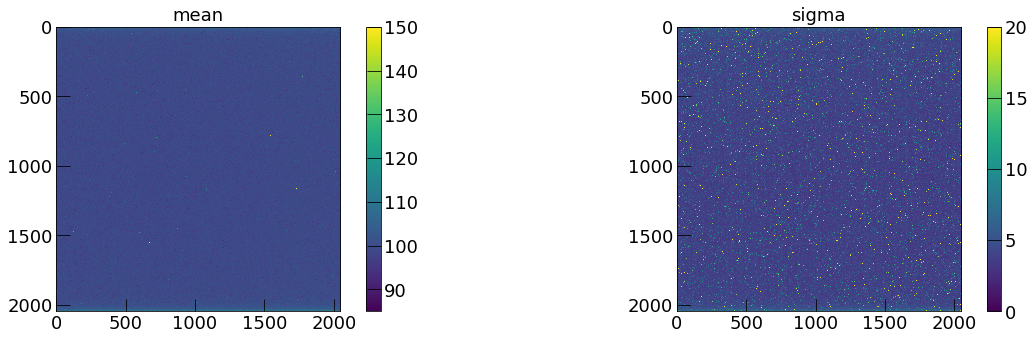

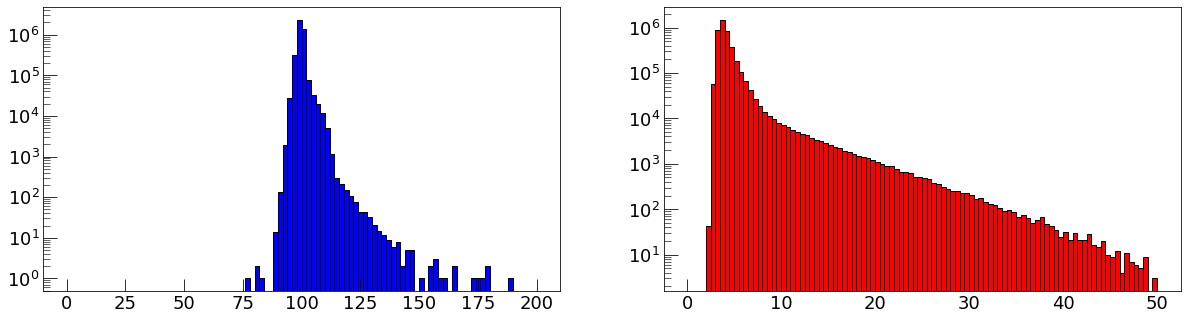

In [17]:
run = runI[nRi]
cy.set_atlas_style('long')
try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    imagem = cy.read_image_h5(fileoutm)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    images = cy.read_image_h5(fileouts)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2)
im = ax[0].imshow(imagem, vmin=85,vmax=150)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, vmin=0,vmax=20)
fig.colorbar(im, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2)
ax[0].hist(imagem.ravel(), bins=100, range=(0.0, 200.), fc='b', ec='k')
ax[1].hist(images.ravel(), bins=100, range=(0.0, 50.0), fc='r', ec='k')
ax[0].set_yscale("log")
ax[1].set_yscale("log")

plt.show()